In [4]:
import pandas as  pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.datasets import load_iris

In [5]:
#data=pd.read_csv(r"C:\Users\Theenesh\Downloads\Iris DataSet.csv")

In [6]:
iris=load_iris()

In [7]:
data=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [8]:
data['Species']=iris.target_names[iris.target]

In [9]:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
data['Species'] = (data['Species'] == 'virginica').astype(int)

In [13]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,1


In [15]:
print(data['Species'].unique())

[0 1]


In [16]:
print(data['Species'].value_counts())

Species
0    100
1     50
Name: count, dtype: int64


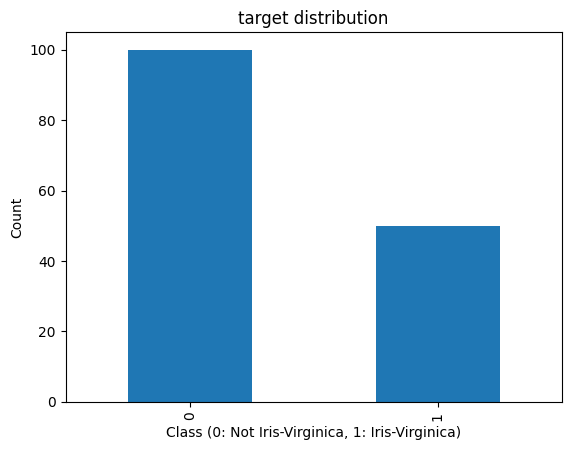

In [17]:
data['Species'].value_counts().plot(kind='bar',title='target distribution')
plt.xlabel('Class (0: Not Iris-Virginica, 1: Iris-Virginica)')
plt.ylabel('Count')
plt.show()

In [18]:
x = data.iloc[:, :-1].values 
y = data.iloc[: ,-1].values

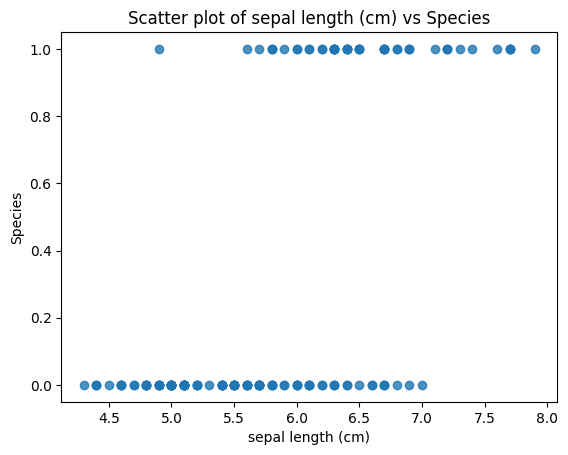

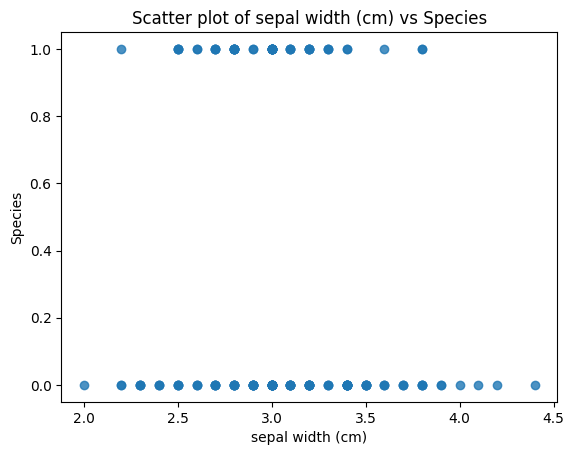

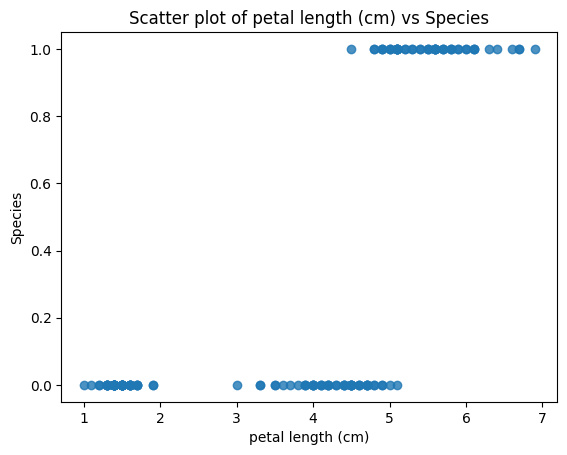

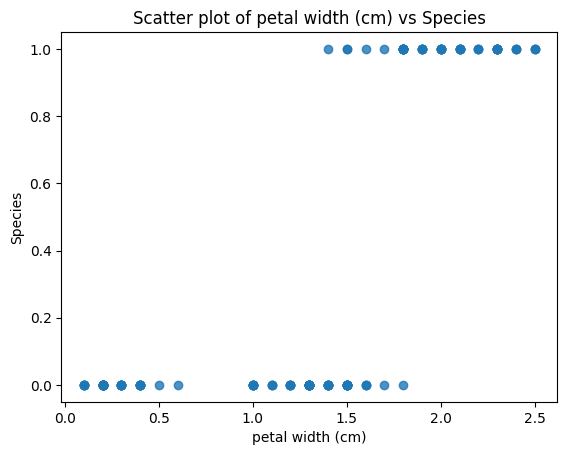

In [19]:


# Assuming `data` is the original DataFrame and `x` is a NumPy array
feature_columns = data.columns[:-1]  # All columns except the last one (Species)

# Iterate over each feature column
for col in feature_columns:
    plt.scatter(data[col], data['Species'], alpha=0.8)
    plt.xlabel(col)
    plt.ylabel('Species')
    plt.title(f'Scatter plot of {col} vs Species')
    plt.show()


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [22]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def logistic(x,y,iteration,learningrate):
    b=0
    m,n=x.shape
    cost_history=[]
    w=np.zeros((n,1))
    for _ in range(iterations):
        ypred=sigmoid(np.dot(x,w)+b)

        cost=(-1/m)*np.sum(y*np.log(ypred)+(1-y)*np.log(1-ypred))

        dw=(1/m)*np.dot(x.T,(ypred-y))
        db=(1/m)*np.sum((ypred-y))

        w-=learningrate*dw
        b-=learningrate*db
        cost_history.append(cost)
        
    return w,b,cost_history
        
iterations=1000
learningrate=0.01



In [23]:
w,b,cost_history=logistic(x_train,y_train,iterations,learningrate)

In [24]:
print("parameters are:")
print(f"w: {w}")
print(f"optimal cost: {cost_history[-1]}")

parameters are:
w: [[-0.68182056]
 [-0.74323697]
 [ 1.11867453]
 [ 0.76356425]]
optimal cost: 0.2856674844403663


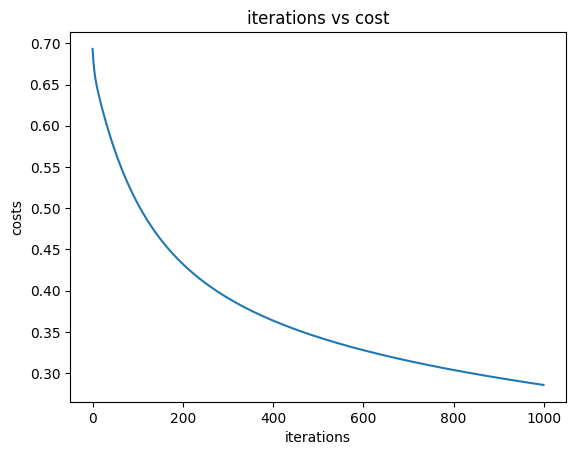

In [25]:
plt.plot(range(iterations),cost_history)
plt.xlabel('iterations')
plt.ylabel('costs')
plt.title('iterations vs cost')
plt.show()

In [26]:
def predict(x,w,b):
    ypred=sigmoid(np.dot(x,w)+b)
    return (ypred>0.5).astype(int)

In [27]:
ypredtest=predict(x_test,w,b)


In [28]:
accuracy = accuracy_score(y_test, ypredtest)
precision = precision_score(y_test, ypredtest)
recall = recall_score(y_test, ypredtest)
f1 = f1_score(y_test, ypredtest)
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Model Evaluation Metrics:
Accuracy: 0.97
Precision: 0.92
Recall: 1.00
F1 Score: 0.96


In [29]:
def evaluationmetrics(ypred,ytest):
    tn=np.sum((ypred==0) & (ytest==0))
    fp=np.sum((ypred==1) & (ytest==0))
    fn=np.sum((ypred==0) & (ytest==1))
    tp=np.sum((ypred==1) & (ytest==1))
    accu=(tp+tn)/len(ytest)
    prec=(tp)/(tp+fp) if(tp+fp)!=0 else 0
    recal=(tp)/(tp+fn) if(tp+fn)!=0 else 0
    f1=(2*prec*recal)/(prec+recal) if (prec + recal) != 0 else 0
    return accu,prec,recal,f1

accuracy, precision, recall, f1score= evaluationmetrics(ypredtest, y_test)
print(f'accuracy : {accuracy : .2f}')
print(f'precision : {precision : .2f}')
print(f'recall : {recall : .2f}')
print(f'f1score : {f1score : .2f}')

accuracy :  0.97
precision :  0.92
recall :  1.00
f1score :  0.96


In [30]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
def predict_single_from_table(row_index, dataset, w, b, threshold=0.5):
   
    features = dataset[row_index, :-1]  
    features = features.reshape(1, -1)  
    prob = sigmoid(np.dot(features, w) + b)
    prediction = (prob >= threshold).astype(int)
    return prediction[0][0]  


row_index = 100
prediction = predict_single_from_table(row_index, data.values, w, b)  
print(f"Prediction for row {row_index}: {prediction}")


Prediction for row 100: 1
